In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy as np
import pickle
from glob import glob

"""Change to the data folder"""
new_path = "data/new_train"

# number of sequences in each dataset
# train:205942  val:3200 test: 36272 
# sequences sampled at 10HZ rate

### Create a dataset class 

In [2]:
class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, data_path: str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.data_path = data_path
        self.transform = transform

        self.pkl_list = glob(os.path.join(self.data_path, '*'))
        self.pkl_list.sort()
        
    def __len__(self):
        return len(self.pkl_list)

    def __getitem__(self, idx):

        pkl_path = self.pkl_list[idx]
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)
            
        if self.transform:
            data = self.transform(data)

        return data


# intialize a dataset
val_dataset  = ArgoverseDataset(data_path=new_path)

In [3]:
val_dataset.pkl_list

['data/new_train/0.pkl',
 'data/new_train/1.pkl',
 'data/new_train/10.pkl',
 'data/new_train/100.pkl',
 'data/new_train/1000.pkl',
 'data/new_train/10000.pkl',
 'data/new_train/100000.pkl',
 'data/new_train/100001.pkl',
 'data/new_train/100002.pkl',
 'data/new_train/100003.pkl',
 'data/new_train/100004.pkl',
 'data/new_train/100005.pkl',
 'data/new_train/100006.pkl',
 'data/new_train/100007.pkl',
 'data/new_train/100008.pkl',
 'data/new_train/100009.pkl',
 'data/new_train/10001.pkl',
 'data/new_train/100010.pkl',
 'data/new_train/100011.pkl',
 'data/new_train/100012.pkl',
 'data/new_train/100013.pkl',
 'data/new_train/100014.pkl',
 'data/new_train/100015.pkl',
 'data/new_train/100016.pkl',
 'data/new_train/100017.pkl',
 'data/new_train/100018.pkl',
 'data/new_train/100019.pkl',
 'data/new_train/10002.pkl',
 'data/new_train/100020.pkl',
 'data/new_train/100021.pkl',
 'data/new_train/100022.pkl',
 'data/new_train/100023.pkl',
 'data/new_train/100024.pkl',
 'data/new_train/100025.pkl',
 '

### Create a loader to enable batch processing

In [4]:
batch_sz = 4

def my_collate(batch):
    """ collate lists of samples into batches, create [ batch_sz x agent_sz x seq_len x feature] """
    inp = [np.dstack([scene['p_in'], scene['v_in']]) for scene in batch]
    out = [np.dstack([scene['p_out'], scene['v_out']]) for scene in batch]
    inp = torch.LongTensor(inp)
    out = torch.LongTensor(out)
    return [inp, out]

val_loader = DataLoader(val_dataset,batch_size=batch_sz, shuffle = False, collate_fn=my_collate, num_workers=0)

### Visualize the batch of sequences

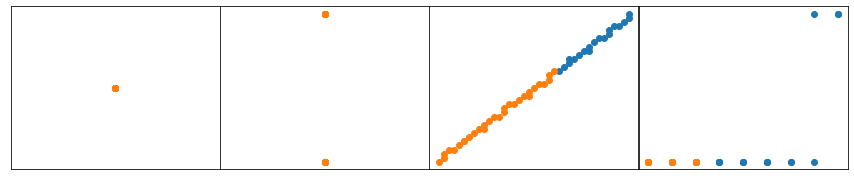

In [5]:
import matplotlib.pyplot as plt
import random

agent_id = 0

def show_sample_batch(sample_batch, agent_id):
    """visualize the trajectory for a batch of samples with a randon agent"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i, agent_id,:,0], inp[i, agent_id,:,1])
        axs[i].scatter(out[i, agent_id,:,0], out[i, agent_id,:,1])

        
for i_batch, sample_batch in enumerate(val_loader):
    inp, out = sample_batch
    """TODO:
      Deep learning model
      training routine
    """
    show_sample_batch(sample_batch, agent_id)
    break

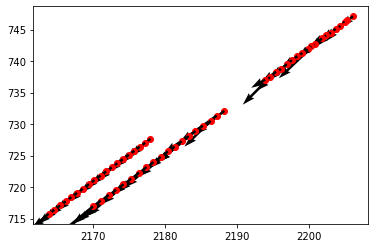

In [6]:
import matplotlib.pyplot as plt

def draw_instance(address,train=False):
  car_mask, p_in, v_in, p_out, v_out = [], [], [], [], []
  with open(address, 'rb') as f:
    data = pickle.load(f)
    car_mask =data['car_mask']
    p_in = data['p_in']
    v_in = data['v_in']
    if(train):
      p_out = data['p_out']
      v_out = data['v_out']

  p_in_masked = []
  v_in_masked = []
  p_out_masked = []
  v_out_masked = []

  for mask in range(len(car_mask)):
    if car_mask[mask][0]==1:
      p_in_masked.append(p_in[mask])
      v_in_masked.append(v_in[mask])
      if(train):
        p_out_masked.append(p_out[mask])
        v_out_masked.append(v_out[mask])

  for i in range(len(p_in_masked)):
      for j in range(len(p_in_masked[i])):
        plt.scatter(p_in_masked[i][j][0], p_in_masked[i][j][1], color='r')
        plt.quiver(p_in_masked[i][j][0], p_in_masked[i][j][1], v_in_masked[i][j][0],v_in_masked[i][j][1], scale=1250/(np.sqrt(v_in_masked[i][j][0]**2+v_in_masked[i][j][1]**2)))
      if(train):
          for j in range(len(p_out_masked[i])):
            plt.scatter(p_out_masked[i][j][0], p_out_masked[i][j][1], color='b')
            plt.quiver(p_out_masked[i][j][0], p_out_masked[i][j][1], v_out_masked[i][j][0],v_out_masked[i][j][1], scale=1500/(np.sqrt(v_out_masked[i][j][0]**2+v_out_masked[i][j][1]**2)), color='g')

draw_instance("data/new_val_in/10189.pkl", train=False)